# Parallels of 2 Kings 19-25
## Similarity plots of 2 Kings 19-25 and its parallels in Isaiah, Jeremiah, 2 Chronicles

# 0. About

## 0.1 Author
Martijn Naaijer.

## 0.2 Dependencies
The plots below are based on data computed by the notebook [kings_ii](kings_ii.html),
which in turn depends on the notebook [parallels](parallels.html).

These notebooks are listed on the tool page [parallel](https://shebanq.ancient-data.org/tools?goto=parallel) of SHEBANQ from where they can be downloaded.

## 0.3 Publications
The plots of this notebook are included in

Naaijer, Martijn and Dirk Roorda (2016). *Parallel Texts in the Hebrew Bible, New Methods and Visualizations*.
Preprint on [arxiv](http://arxiv.org/abs/1603.01541). To be published in the 
[Journal of Datamining and Digitial Humanities](http://jdmdh.episciences.org).

# 1. Results
This notebook contains the R scripts that were used to make the figures in the article.
The data comes out of the [kings_ii](kings_ii.html) notebook, and is a list of over 200,000 similarity measures between the sentences of 2 Kings 19-25 and those of its parallel chapters in Isaiah, Jeremiah and 2 Chronicles.

# 2. Implementation

## 2.1 Technical
This notebook uses the R package *vioplot*, which depends on *sm*, which needs a Fortran compiler to be installed.
On Mac OS X it is necessary to install such a compiler first. In this notebook, we installed one from 
[gcc.gnu](https://gcc.gnu.org/wiki/GFortranBinaries).

In [2]:
REPO = 'http://cran.xl-mirror.nl/'
#install.packages('vioplot', repos=REPO)
library(vioplot)

Loading required package: sm
Package 'sm', version 2.2-5.4: type help(sm) for summary information


## 2.1 Row selection

The rows of the similarity file consist of tab-separated lines with 9 fields:
4 fields to specify one sentence of the comparison (book, chapter, verse, sentence number within verse), 4 more fields to specify the other sentence, and the 9th field holds the similarity (in percents) between the two sentences.

The rows are ordered in such a way that the sentences in our reference chapters 2 Kings 19-25 are listed first, and after that the other sentences. All sentences are ordered by book, chapter, verse and sentence number.

The similarities are specified only once per pair of sentences.
There are no similarities with sentences in 2 Kings outside the chapters 19-25.

So all similarities with verses in 2 Kings 19-25 occur in rows that have as book of the first sentence: ``2_Kings``.

We store these rows in ``dat2``.

We are not interested in similarities inside 2 Kings 19-25. These are exactly the rows where the book of the second sentence is ``2_Kings``. We store the remaining interesting rows in ``dat3``.

In [3]:
dat <- read.table("kings_similarities.tsv", sep = '\t' ,header = TRUE)
dat2 <- dat[dat$book_1 == '2_Kings',]
dat3 <- dat2[dat2$book_2 != '2_Kings',]

# 3. Figures

## Figure 1

Overview of the distribution of all interesting similarities.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   24.00   29.00   29.26   34.00  100.00 

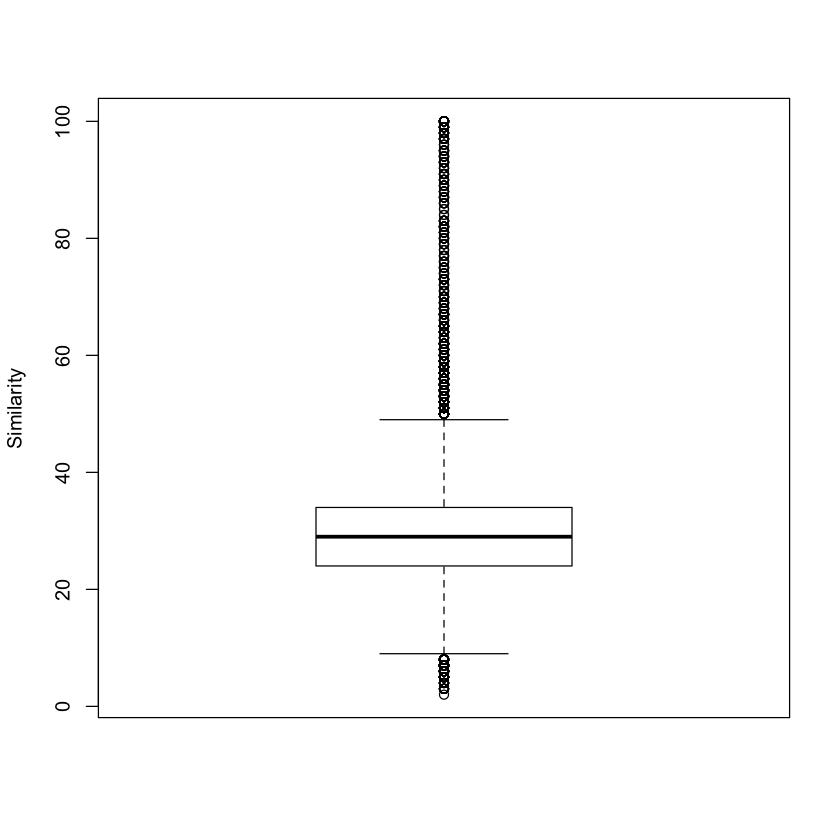

In [4]:
boxplot(dat3$sim, ylab = 'Similarity')
summary(dat3$sim)

## Figure 2
(This one needs the package *vioplot*.)
A more sophisticated overview of the interesting similarities.

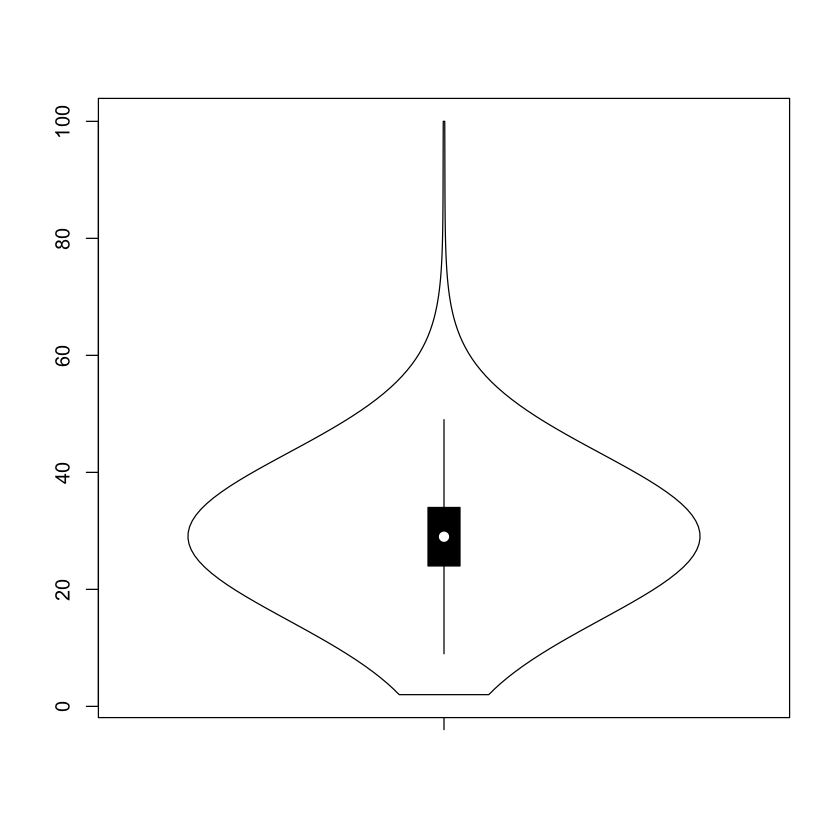

In [5]:
vioplot(dat3$sim, names = '', col = 'white')

## Figure 3

Overview of the interesting similarities with the sentences of 2 Kings 19-25, separated by the books of the sentences outside 2 Kings 19-25

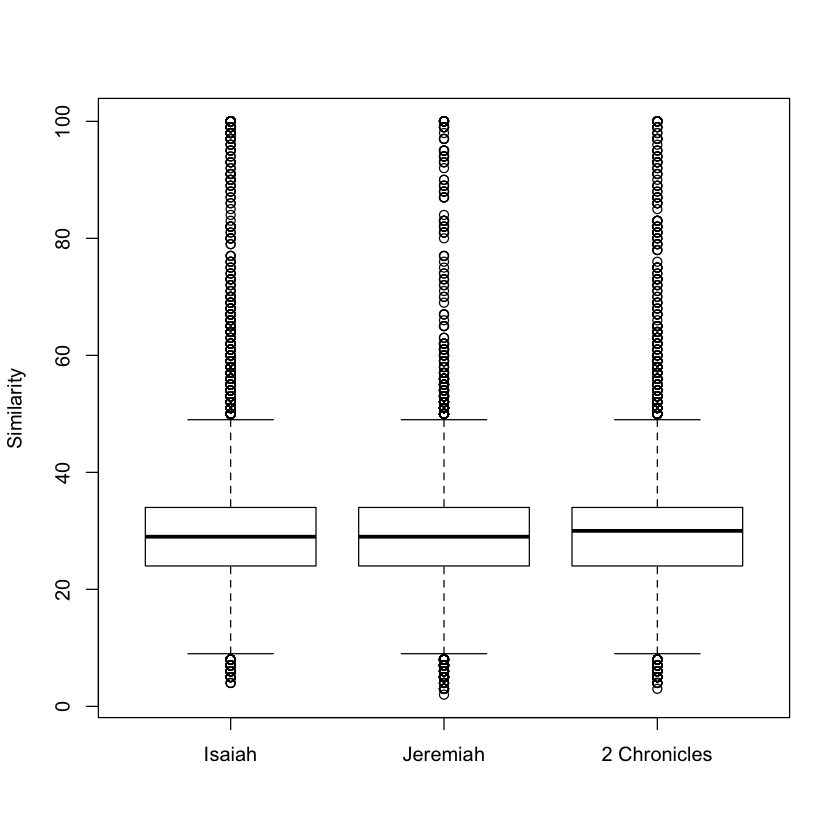

In [6]:
jer <- dat3[dat3$book_2 =='Jeremiah',]
jes <- dat3[dat3$book_2 =='Isaiah',]
chr <- dat3[dat3$book_2 =='2_Chronicles',]
boxplot(jes$sim, jer$sim, chr$sim, names = c('Isaiah', 'Jeremiah', '2 Chronicles'),  ylab = 'Similarity')

## Figure 4

The same view as in Figure 3, but now restricted to those similarities that exceed a certain threshold (60% or more).

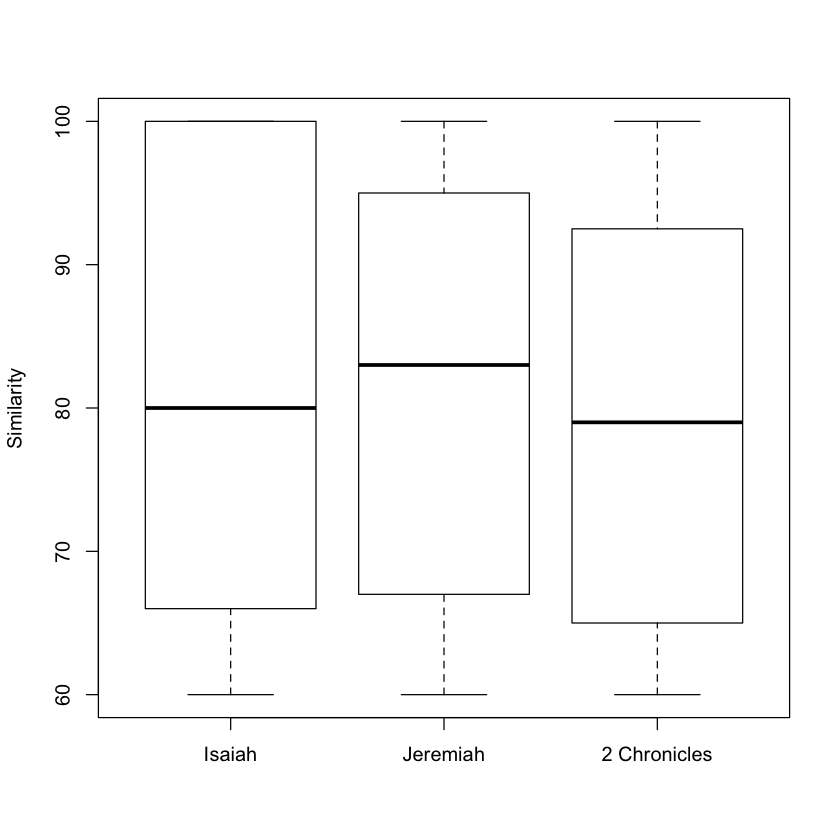

In [7]:
jer60 <- jer[jer$sim > 59,]
jes60 <- jes[jes$sim > 59,]
chr60 <- chr[chr$sim > 59,]
boxplot(jes60$sim, jer60$sim, chr60$sim, names = c('Isaiah', 'Jeremiah', '2 Chronicles'), ylab = 'Similarity')

## Figure 5 and t-test

Here we constrain the similarities even more, to those of 80% and more.
We also give the results of the t-test.


	Welch Two Sample t-test

data:  jes80$sim and jer80$sim
t = 3.4953, df = 110.46, p-value = 0.0006826
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.455433 5.266286
sample estimates:
mean of x mean of y 
 95.84615  92.48529 



	Welch Two Sample t-test

data:  jes80$sim and chr80$sim
t = 4.5639, df = 145.75, p-value = 1.058e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.329075 5.887043
sample estimates:
mean of x mean of y 
 95.84615  91.73810 



	Welch Two Sample t-test

data:  jer80$sim and chr80$sim
t = 0.65498, df = 144.47, p-value = 0.5135
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.507599  3.001997
sample estimates:
mean of x mean of y 
 92.48529  91.73810 


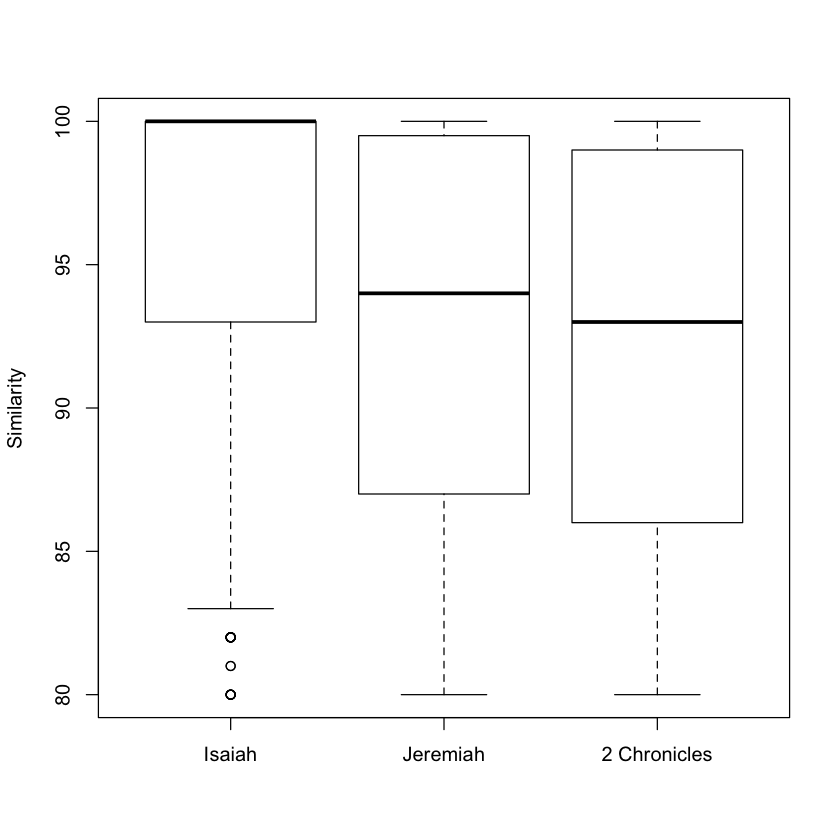

In [9]:
jer80 <- jer[jer$sim > 79,]
jes80 <- jes[jes$sim > 79,]
chr80 <- chr[chr$sim > 79,]
boxplot(jes80$sim, jer80$sim, chr80$sim, names = c('Isaiah', 'Jeremiah', '2 Chronicles'), ylab = 'Similarity')

t.test(jes80$sim, jer80$sim)
t.test(jes80$sim, chr80$sim)
t.test(jer80$sim, chr80$sim)